<a href="https://colab.research.google.com/github/arsalanrzp/Pattern-Recognition/blob/main/Incorrect_Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incorrect FCM python code by AMIR ARSALAN REZAPOUR

    using original MNIST dataset

In [2]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_X = train_X.reshape(-1, 28*28)

In [5]:
n = len(train_X)
#number of clusters
k = 10
#dimension of cluster
d = 784
# m parameter
m = 2
#number of iterations
MAX_ITERS = 10

# **Initializing Membership Matrix**

### <b>w<sub>ij</sub></b> values are assigned randomly.

In [6]:
def initializeMembershipWeights():
  membership_mat = []
  final_matrix = []
  for i in range(n):
    wts = []
    sum=0;
    for j in range(k):
      weight = np.random.randint(1,10)
      wts.append(weight)
      sum = sum + weight
    weights = [w/sum for w in wts]
    membership_mat.append(weights)
    final_matrix.append(membership_mat)
  return np.array(membership_mat)


# **Calculating Cluster Center**

### To calculate centroids for each cluster we apply the following formula:

## C<sub>j</sub> = $ \frac{\sum_{i=1}^{n} W_{ij}^m x_{i}}{\sum_{i=1}^{n} W_{ij}^m} $

### m(fuzzy-ness) ranges from 1 to $\infty$

In [7]:
def computeCentroids(weight_arr):
  C = []
  for i in range(k):
    weight_sum = np.power(weight_arr[:,i],m).sum()
    Cj = []
    for x in range(d):
      numerator = ( train_X[:,x] * np.power(weight_arr[:,i],m)).sum()
      c_val = numerator/weight_sum;
      Cj.append(c_val)
    C.append(Cj)
  return C

# **Updating Membership Value**

### Calculate the fuzzy-pseudo partition with the above formula
## $$w_{ij} = \frac{(\frac{1}{dist(x_i, c_j)})^{\frac{1}{m-1}}}{\sum_{s=1}^{k}(\frac{1}{dist(x_i,c_s)})^{\frac{1}{m-1}}}w
ij$$


### where $dist (x_i, c_j)$ is the Euclidean distance between $x_{i}$ and $c_{j}$ cluster center.

In [8]:
# def updateWeights(weight_arr,C):
#   denom = np.zeros(n)
#   for i in range(k):
#     dist = (train_X[:,:] - C[i])**2
#     dist = np.sum(dist, axis=1)
#     dist = np.sqrt(dist)
#     denom  = denom + np.power(1/dist,1/(m-1))
#   numerator = np.zeros(n)
#   for i in range(k):
#     dist = (train_X[:,:] - C[i])**2
#     dist = np.sum(dist, axis=1)
#     dist = np.sqrt(dist)
#     numerator[i] = np.power(1/dist,1/(m-1))
#   return weight_arr

def updateWeights(weight_arr,C):
  membership = np.zeros((n, k))
  distances = np.linalg.norm(train_X[:, np.newaxis, :] - C, axis=2)
  for i in range(n):
        for j in range(k):
            denominator = np.sum((1.0 / distances[i]) ** (1.0 / (m - 1)))
            membership[i, j] = ((1.0 / distances[i, j]) ** (1.0 / (m - 1))) / denominator

  return membership

In [9]:
def FuzzyMeansAlgorithm():
  weight_arr = initializeMembershipWeights()
  plt.figure(figsize=(50,50))
  for z in range(MAX_ITERS):
    C = computeCentroids(weight_arr)
    updateWeights(weight_arr,C)
  plt.show()
  return (weight_arr,C)

In [10]:
test = FuzzyMeansAlgorithm()

<Figure size 5000x5000 with 0 Axes>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


def plot(dataset, cluster_centers, membership_matrix, c, labels=None):

    ax = plt.subplots()[1]

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(membership_matrix, axis=0)

    dataset = PCA(n_components=2).fit_transform(dataset).T

    for j in range(c):
        ax.scatter(
            dataset[0][cluster_membership == j],
            dataset[1][cluster_membership == j],
            alpha=0.5,
            edgecolors="none")

    ax.legend()
    ax.grid(True)
    plt.show()

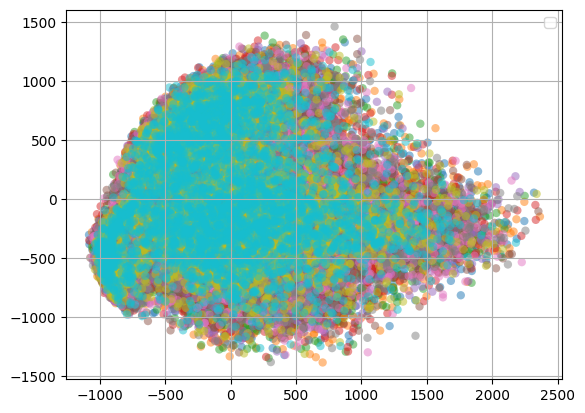

In [16]:
plot(train_X, np.array(test[1]).T, np.array(test[0]).T, 10)

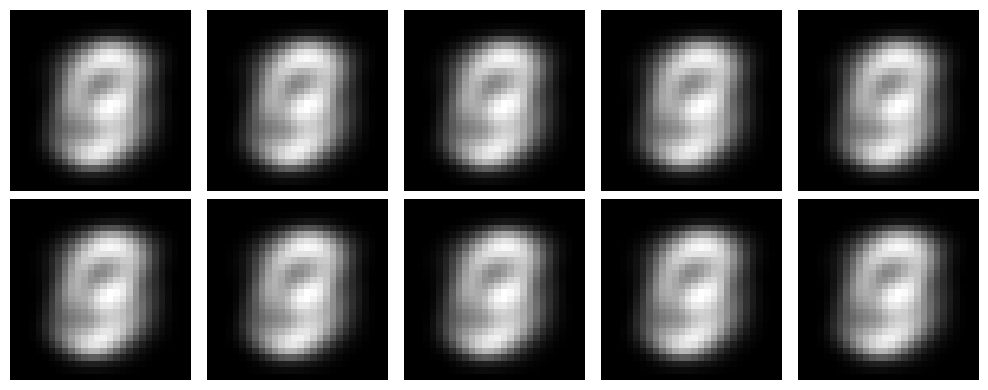

In [ ]:
mnist_images_reshaped = [np.array(image).reshape(28, 28) for image in test[1]]

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(mnist_images_reshaped[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()